# Week 13 Warm-Up
## Analyzing the 4-year BLS Data
>- Here we will be analyzing the combined cleaned BLS data that you created from Quiz 9 called, `bls4yr`
>- If you haven't exported your cleaned file you can do that with the following code:  `bls4yr.to_excel('bls4yr.xlsx',index=False)`

In [13]:
import pandas as pd, os, matplotlib.pyplot as plt

In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 2C8F-B3AE

 Directory of C:\Users\Cupcake\Google Drive\School\Senior Year 2020-2021\Fall 2020\BAIM 3220\Python\Week13

11/17/2020  08:29 AM    <DIR>          .
11/17/2020  08:29 AM    <DIR>          ..
11/17/2020  08:09 AM    <DIR>          .ipynb_checkpoints
11/17/2020  08:05 AM             6,159 Week 13 Exercises - Data Visualization - student.ipynb
11/17/2020  08:29 AM            12,335 Week13_WarmUp_EDA_bls4yr_student.ipynb
               2 File(s)         18,494 bytes
               3 Dir(s)  26,049,105,920 bytes free


In [11]:
os.getcwd()

'C:\\Users\\Cupcake\\Google Drive\\School\\Senior Year 2020-2021\\Fall 2020\\BAIM 3220\\Python\\Week13'

### Q1. Create a DataFrame named `bls_amean`
>- This will be a subset of the `bls4yr` DataFrame you created in Quiz 9
>- Include these fields from `bls4yr`
>>- year, occ_title, a_mean
>- Only include the records for "major" from the `group` field
>>- You should have 88 total records in this new dataframe (There are 22 major groups, 4 years of data, so 88 total records)

In [15]:
bls = pd.read_excel(r'C:\Users\Cupcake\Google Drive\School\Senior Year 2020-2021\Fall 2020\BAIM 3220\Python\Week12\bls4yr.xlsx')
bls_amean = bls[['year','occ_title','a_mean']].loc[bls['group']=='major']

In [16]:
bls_amean.head()

,year,occ_title,a_mean
1,2008,MANAGEMENT OCCUPATIONS,100310.0
36,2008,BUSINESS AND FINANCIAL OPERATIONS OCCUPATIONS,64720.0
67,2008,COMPUTER AND MATHEMATICAL OCCUPATIONS,74500.0
84,2008,ARCHITECTURE AND ENGINEERING OCCUPATIONS,71430.0
120,2008,"LIFE, PHYSICAL, AND SOCIAL SCIENCE OCCUPATIONS",64280.0


In [17]:
bls_amean.shape

(88, 3)

### Q2: What is the overall average `a_mean` (annual average salary) over the 4 years of data?
>- Round to two decimals

In [20]:
round(bls_amean['a_mean'].mean(),2)

49256.02

### Q3. What is the average annual salary for each major occupational title (occ_title)?
>- Show the number of observations (count) used in the average calculation as well as the mean
>- Sort the results in descending order
>>- What occupational title had the highest average salary?

In [77]:
# bls_amean.groupby(['year','occ_title']).agg({'occ_title':['count'],
#                                             'a_mean':['mean']}).sort_values(by = 'mean',ascending=False)


# bls_amean.groupby(['year','occ_title']).a_mean.agg('mean').sort_values(ascending=False)



bls_amean.groupby('occ_title').agg({'occ_title':'count',
                                          'a_mean':'mean'}).sort_values(by = 'a_mean',ascending=False)

,occ_title,a_mean
occ_title,,
MANAGEMENT OCCUPATIONS,4,104015.0
LEGAL OCCUPATIONS,4,95852.5
COMPUTER AND MATHEMATICAL OCCUPATIONS,4,76687.5
ARCHITECTURE AND ENGINEERING OCCUPATIONS,4,74422.5
HEALTHCARE PRACTITIONERS AND TECHNICAL OCCUPATIONS,4,70397.5
BUSINESS AND FINANCIAL OPERATIONS OCCUPATIONS,4,66762.5
"LIFE, PHYSICAL, AND SOCIAL SCIENCE OCCUPATIONS",4,65950.0
"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA OCCUPATIONS",4,52132.5
"EDUCATION, TRAINING, AND LIBRARY OCCUPATIONS",4,49825.0


### Q4. Try to plot the annual average salary (`a_mean`) across the 4 years of data 
>- In this case you want to plot the average salary across all occupations for each year (i.e., one data point per year representing the overall average salary for that year) 
>- We will go over plotting today in class but give this a try on your own first


In [78]:
import matplotlib.pyplot as plt

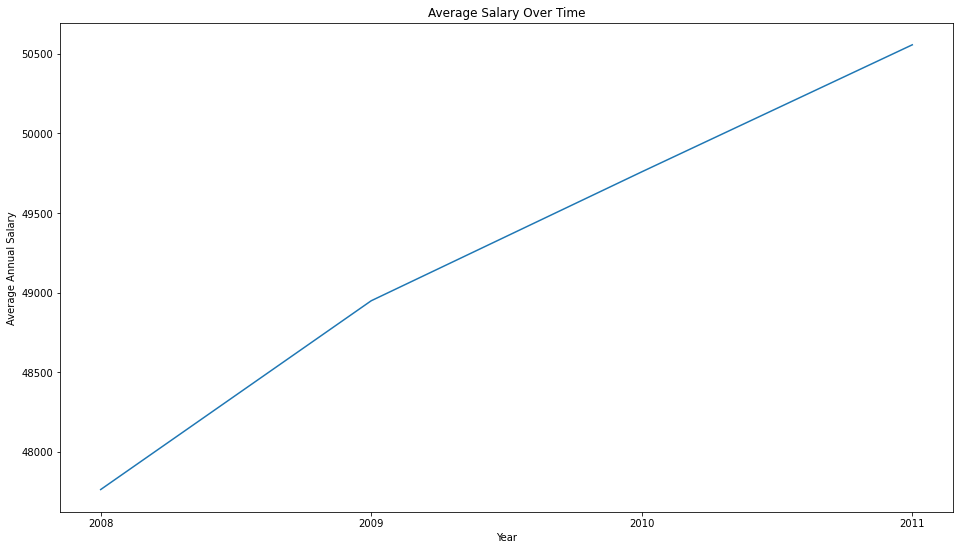

In [83]:
# We have 4 yeaars of data so we can define this as the x-axis
x = ['2008','2009','2010','2011']

# Then define the y-data as the average oper year
y = bls_amean.groupby('year').a_mean.mean()


plt.figure(figsize=(16,9))
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.plot(x,y)
plt.show()

### Q5. If you got the plot by year, try to plot by year and occ_title
>- This will show the annual salaries over time for each major occ_title

In [116]:
# bls_amean['occ_title'].nunique()
x = ['2008','2009','2010','2011']
y = bls_amean.groupby(['year','occ_title']).max()['a_mean'].unstack().iloc[:,:5]

# Unstack pivots the second field the group by to columns
# This will allow us to create plots for each occ_title
# Were sticking with iloc to include only a few title

y

occ_title,ARCHITECTURE AND ENGINEERING OCCUPATIONS,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA OCCUPATIONS",BUILDING AND GROUNDS CLEANING AND MAINTENANCE OCCUPATIONS,BUSINESS AND FINANCIAL OPERATIONS OCCUPATIONS,COMMUNITY AND SOCIAL SERVICE OCCUPATIONS
year,,,,,
2008,71430.0,50670.0,24370.0,64720.0,41790.0
2009,73590.0,51720.0,24970.0,65900.0,42750.0
2010,75550.0,52290.0,25300.0,67690.0,43180.0
2011,77120.0,53850.0,25560.0,68740.0,43830.0


In [117]:
y.columns.str[0:10]
#condesing titles to 10 characters

Index(['ARCHITECTU', 'ARTS, DESI', 'BUILDING A', 'BUSINESS A', 'COMMUNITY '], dtype='object', name='occ_title')

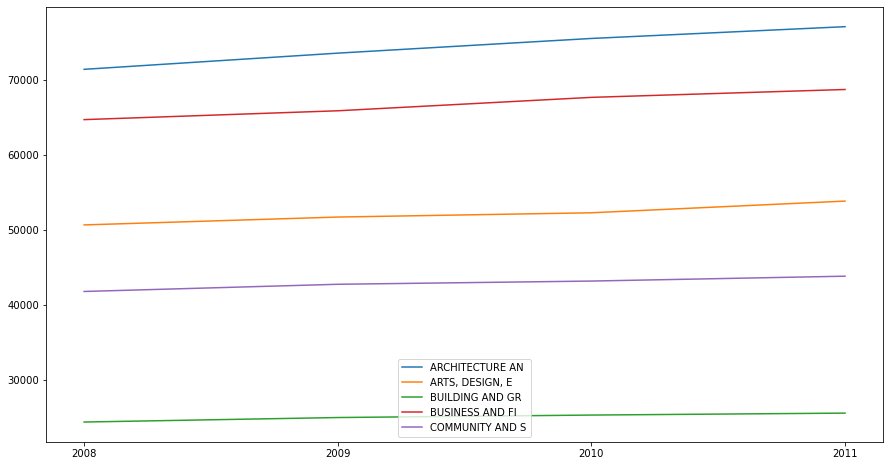

In [119]:
plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.legend(y.columns.str[0:15])
plt.show()